In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import scipy.optimize as sco
import investpy
import datetime
from dateutil.relativedelta import relativedelta

<span style="color:blue">Each group of students (of no more than 4) will collect daily data for at least five years on the following instruments: at least six stocks, two corporate bonds of your choice, and two commodities of your choice. Use assets traded on US exchanges and markets. You are free to use mutual funds or Exchnage-Traded Funds instead of individual assets. Also, collect the risk-free rate of your choice and the S&P 500 index. The project must be executed using EXCEL. You should perform, at least, the following tasks for the completion of the project along with the suitable explanations (both narrative/verbal and mathematical): 
</span>


In [2]:
# given a list of tickers, this function returns a DataFrame with the Adj Close for the assets specified 
# and the period specified
def get_data(tickers_list, period,interval = '1mo'):
    data = pd.DataFrame(columns=tickers_list)

    for ticker in tickers_list:
        t = yf.Ticker(ticker)
        temp = t.history(period=period,interval=interval)
        data[ticker] = temp.Close
    
    return data

In [3]:
# portfolio allocation for stocks, bonds and commodities respectively
ss, bb, cc = 0.7, 0.2, 0.1

# instrument selection
stocks = ['QCOM',
          'TEAM',
          'TSLA',
          'BABA',
#           'ALXN',
          'BLK'
         ]
bonds = [
    'PYACX',
    'VWEHX'
  ]
commodities = ['gold','palladium']

rf = 1.3
sp500 = ['^GSPC']

assets = stocks + bonds + commodities +sp500
print(assets)

['QCOM', 'TEAM', 'TSLA', 'BABA', 'BLK', 'PYACX', 'VWEHX', 'gold', 'palladium', '^GSPC']


In [4]:
# fetch daily historical prices (Adj Close) from Yahoo! Finance
d0 = get_data(stocks + bonds, '5y',interval='1d').dropna()
benchmark = get_data(sp500, '5y',interval='1d').dropna()

In [5]:
d = datetime.datetime.now() - relativedelta(years=5)
from_date = str(d.day) + '/' + str(d.month) + '/' + str(d.year)
d = datetime.datetime.now()
to_date = str(d.day) + '/' + str(d.month) + '/' + str(d.year)

d1 = investpy.commodities.get_commodity_historical_data(commodity=commodities[0],from_date=from_date, to_date=to_date)['Close']
d2 = investpy.commodities.get_commodity_historical_data(commodity=commodities[1],from_date=from_date, to_date=to_date)['Close']

In [6]:
# Place the DataFrames side by side
c = pd.concat([d1, d2], axis=1)
c.columns = commodities

In [7]:
c.shape

(1411, 2)

In [8]:
data = pd.concat([d0, c, benchmark], axis=1)
data = data.dropna()
data

,QCOM,TEAM,TSLA,BABA,BLK,PYACX,VWEHX,gold,palladium,^GSPC
Date,,,,,,,,,,
2015-12-09,41.87,21.00,224.52,83.42,310.58,9.16,4.48,1117.3,552.55,2047.62
2015-12-10,41.86,27.78,227.07,84.33,311.19,9.15,4.48,1112.7,542.70,2052.23
2015-12-11,40.90,27.50,217.02,79.74,290.94,9.20,4.43,1116.2,545.05,2012.37
2015-12-14,40.36,26.26,218.58,80.57,288.07,9.12,4.38,1103.8,549.15,2021.94
2015-12-15,41.38,26.50,221.09,82.49,297.03,9.11,4.41,1102.2,567.40,2043.41
...,...,...,...,...,...,...,...,...,...,...
2020-01-22,92.97,131.46,569.56,222.37,536.86,11.89,5.98,1556.7,2391.00,3321.75
2020-01-23,92.00,132.64,572.20,219.13,541.94,11.91,5.97,1565.4,2365.25,3325.54
2020-01-24,89.65,146.79,564.82,213.75,536.84,11.95,5.96,1571.9,2322.00,3295.47


In [9]:
# show the DataFrame
data.head()

,QCOM,TEAM,TSLA,BABA,BLK,PYACX,VWEHX,gold,palladium,^GSPC
Date,,,,,,,,,,
2015-12-09,41.87,21.00,224.52,83.42,310.58,9.16,4.48,1117.3,552.55,2047.62
2015-12-10,41.86,27.78,227.07,84.33,311.19,9.15,4.48,1112.7,542.70,2052.23
2015-12-11,40.90,27.50,217.02,79.74,290.94,9.20,4.43,1116.2,545.05,2012.37
2015-12-14,40.36,26.26,218.58,80.57,288.07,9.12,4.38,1103.8,549.15,2021.94
2015-12-15,41.38,26.50,221.09,82.49,297.03,9.11,4.41,1102.2,567.40,2043.41


In [10]:
returns = data.pct_change()[1:]

C:\Users\nikdim\Anaconda3\envs\nikdim\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


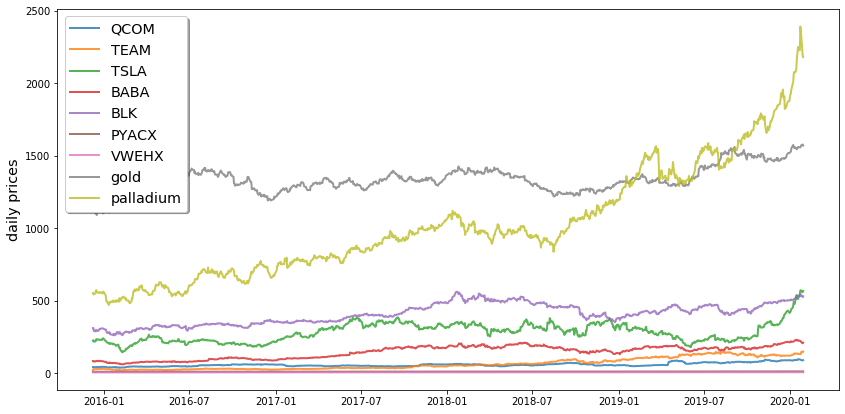

In [11]:
# plot historical prices for all assets
plt.figure(figsize=(14, 7))
for c in data.columns[:-1].values:
    plt.plot(data.index, data[c], lw=2, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize='x-large',shadow=True)
plt.ylabel('daily prices', fontsize='x-large')
plt.savefig('../report/media/daily_prices.png', bbox_inches='tight')

## Question 1
 <span style="color:blue">Decide on the allocation of your budget to each of the above instruments. Rationalize your choice based on your own investment philosophy. You should fill out a risk tolerance questionnaire and supply both the questionnaire and its suggested allocation (in the project’s Appendix). In your discussion, please explain the choice of your investment vehicles and their significance in your portfolio. Label this as your investment policy statement (IPS). </span>

 <span style="color:red">**SEE REPORT**</span>

## Question 2
<span style="color:blue">Outline your investment objectives, constraints and strategies and discuss the relative importance of risk and return in your investment decision making.</span>

 <span style="color:red">**SEE REPORT**</span>

## Question 3
<span style="color:blue">Provide a preliminary discussion of the effects of the short investment horizon in your decision(s) and diversification strategy.</span>

 <span style="color:red">**SEE REPORT**</span>

## Question 4
<span style="color:blue">Compute the descriptive statistics for each instrument. Explain each metric you computed from the perspective of the investor. Provide graphs as well. </span>

Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include the standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.

In [12]:
# mean
# median
# mode -> decided not to measure since a distribution can have multiple modes 

# standard deviation
# variance
# minimum
# maximum
# kurtosis
# skewness

In [13]:
q4 = ['mean','median','std','var','min','max','kurtosis','skewness']
q5 = ['alpha','beta','r-squared']

In [14]:
df = pd.DataFrame(columns= q4+q5,index=assets)

In [15]:
import statistics
import scipy.stats

for i in range(len(assets)):
    # fetch returns for asset i
    l = returns[assets[i]].tolist()
    # compute descriptive statistics for instrument i
    df.iloc[i]['mean'] = statistics.mean(l)
    df.iloc[i]['median'] = statistics.median(l)
    df.iloc[i]['std'] = statistics.stdev(l)
    df.iloc[i]['var'] = statistics.variance(l)
    df.iloc[i]['min'] = min(l)
    df.iloc[i]['max'] = max(l)
    df.iloc[i]['kurtosis'] = scipy.stats.kurtosis(l)
    df.iloc[i]['skewness'] = scipy.stats.skew(l)
  
# print df
df.iloc[:,:-len(q5)].T

,QCOM,TEAM,TSLA,BABA,BLK,PYACX,VWEHX,gold,palladium,^GSPC
mean,0.000921521,0.00228456,0.00131788,0.00108266,0.000612791,0.000257935,0.000276397,0.000356155,0.00146108,0.000485619
median,0.000942329,0.00293902,0.00085879,0.00100722,0.000664808,0,0,0.000267785,0.0021448,0.000602635
std,0.0198444,0.0284707,0.0292674,0.0196701,0.014002,0.00236856,0.00254777,0.00760358,0.0166719,0.00813403
var,0.000393799,0.000810582,0.00085658,0.000386914,0.000196056,5.61007e-06,6.49115e-06,5.78144e-05,0.000277954,6.61625e-05
min,-0.127205,-0.15875,-0.139015,-0.0681706,-0.0716706,-0.0131579,-0.0134615,-0.0334349,-0.0740462,-0.0409792
max,0.232162,0.322857,0.176692,0.132919,0.0537754,0.00773861,0.0116505,0.0452319,0.0740757,0.0495938
kurtosis,23.5332,22.612,5.17545,2.79483,2.87126,1.13364,4.39153,3.51997,1.68952,4.35418
skewness,1.36991,1.60936,0.3167,0.241728,-0.451313,-0.316738,-0.339491,0.290666,-0.278651,-0.559417


In [31]:
dd = df.iloc[:,:-len(q5)].T
dd = dd.astype(float).round(6)
dd.to_csv('../report/media/df.csv', encoding='utf-8')
print(dd.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &       QCOM &       TEAM &      TSLA &      BABA &       BLK &     PYACX &     VWEHX &      gold &  palladium &     \textasciicircum GSPC \\
\midrule
mean     &   0.000922 &   0.002285 &  0.001318 &  0.001083 &  0.000613 &  0.000258 &  0.000276 &  0.000356 &   0.001461 &  0.000486 \\
median   &   0.000942 &   0.002939 &  0.000859 &  0.001007 &  0.000665 &  0.000000 &  0.000000 &  0.000268 &   0.002145 &  0.000603 \\
std      &   0.019844 &   0.028471 &  0.029267 &  0.019670 &  0.014002 &  0.002369 &  0.002548 &  0.007604 &   0.016672 &  0.008134 \\
var      &   0.000394 &   0.000811 &  0.000857 &  0.000387 &  0.000196 &  0.000006 &  0.000006 &  0.000058 &   0.000278 &  0.000066 \\
min      &  -0.127205 &  -0.158750 & -0.139015 & -0.068171 & -0.071671 & -0.013158 & -0.013462 & -0.033435 &  -0.074046 & -0.040979 \\
max      &   0.232162 &   0.322857 &  0.176692 &  0.132919 &  0.053775 &  0.007739 &  0.011650 &  0.045232 &   0.074076 &  0.049594 \

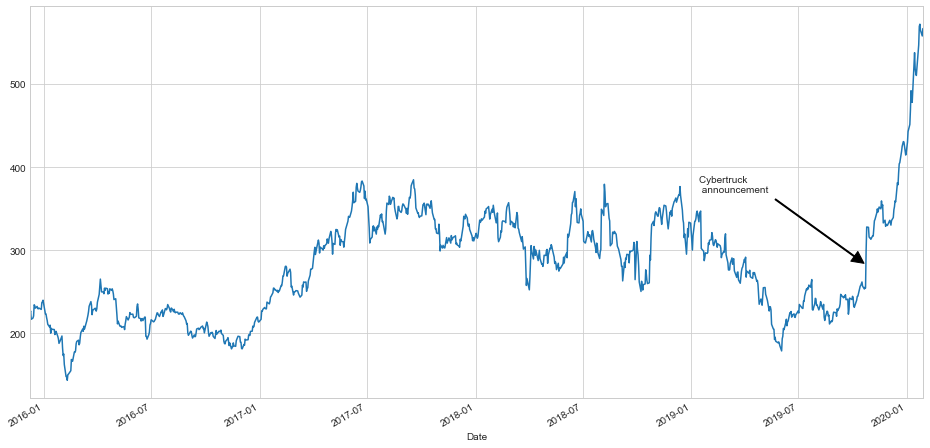

In [19]:
# Annotated graph for minimum and maximum
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))
data['TSLA'].plot(ax=ax)

style = dict(size=10, color='black')
# ax.text('2019-1-14', 370, "Cybertruck \n announcement", **style)
ax.annotate('Cybertruck \n announcement', xy=('2019-10-29', 280), xytext=('2019-1-14', 370),
            arrowprops=dict(facecolor='black', shrink=0.05,width=1))
plt.savefig('../report/media/cybertruck.png', bbox_inches='tight')

In [20]:
 range(len(assets))

range(0, 10)

In [21]:
returns

,QCOM,TEAM,TSLA,BABA,BLK,PYACX,VWEHX,gold,palladium,^GSPC
Date,,,,,,,,,,
2015-12-10,-0.000239,0.322857,0.011358,0.010909,0.001964,-0.001092,0.000000,-0.004117,-0.017826,0.002251
2015-12-11,-0.022934,-0.010079,-0.044259,-0.054429,-0.065073,0.005464,-0.011161,0.003146,0.004330,-0.019423
2015-12-14,-0.013203,-0.045091,0.007188,0.010409,-0.009865,-0.008696,-0.011287,-0.011109,0.007522,0.004756
2015-12-15,0.025273,0.009139,0.011483,0.023830,0.031104,-0.001096,0.006849,-0.001450,0.033233,0.010619
2015-12-16,0.001208,0.001509,0.060699,0.025943,0.004410,0.000000,0.002268,0.014063,0.008724,0.014515
...,...,...,...,...,...,...,...,...,...,...
2020-01-22,-0.016607,0.001066,0.040863,0.000495,0.014590,0.000842,0.000000,-0.000770,0.074076,0.000289
2020-01-23,-0.010433,0.008976,0.004635,-0.014570,0.009462,0.001682,-0.001672,0.005589,-0.010770,0.001141
2020-01-24,-0.025543,0.106680,-0.012898,-0.024552,-0.009411,0.003359,-0.001675,0.004152,-0.018286,-0.009042


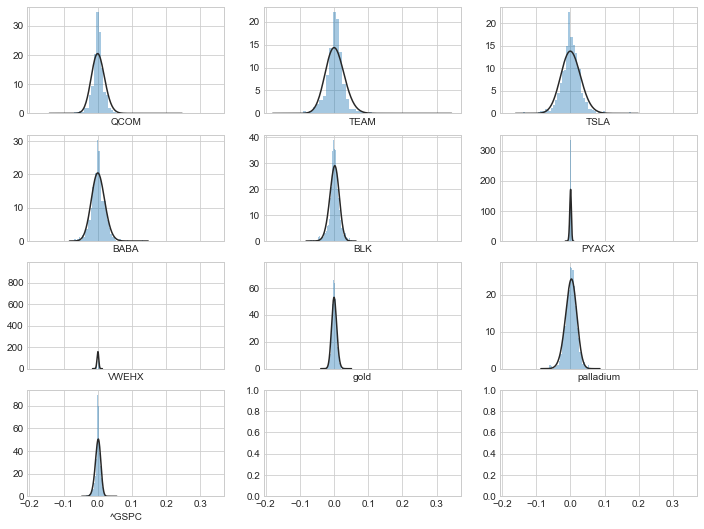

In [22]:
# plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(4,3,figsize=(12, 9), sharex=True)
for i in range(len(assets)):
    sns.distplot(returns[assets[i]],fit=scipy.stats.skewnorm, kde=False, ax=ax[i//3, np.mod(i,3)])
plt.savefig('../report/media/distplot.png', bbox_inches='tight')

## Question 5
<span style="color:blue">Compute additional metrics for the assets such as the correlation and covariance matrices, for the entire and two subperiods (of your own choosing), if needed. Interpret your findings. Also, compute each fund’s alpha, beta, R-square. Interpret your findings from the perspective of the investor.</span>

In [30]:
print(returns.cov().to_latex())
print('\n')
print(returns.corr().to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &      QCOM &      TEAM &      TSLA &      BABA &       BLK &         PYACX &         VWEHX &      gold &  palladium &     \textasciicircum GSPC \\
\midrule
QCOM      &  0.000394 &  0.000138 &  0.000116 &  0.000141 &  0.000121 & -6.761679e-06 &  1.027417e-05 & -0.000020 &   0.000042 &  0.000080 \\
TEAM      &  0.000138 &  0.000811 &  0.000167 &  0.000175 &  0.000111 & -4.098970e-06 &  1.331404e-05 & -0.000011 &   0.000038 &  0.000093 \\
TSLA      &  0.000116 &  0.000167 &  0.000857 &  0.000169 &  0.000106 & -5.648866e-06 &  1.360635e-05 & -0.000013 &   0.000057 &  0.000087 \\
BABA      &  0.000141 &  0.000175 &  0.000169 &  0.000387 &  0.000122 & -4.224175e-06 &  1.450409e-05 & -0.000012 &   0.000067 &  0.000093 \\
BLK       &  0.000121 &  0.000111 &  0.000106 &  0.000122 &  0.000196 & -8.851623e-06 &  1.374404e-05 & -0.000019 &   0.000050 &  0.000090 \\
PYACX     & -0.000007 & -0.000004 & -0.000006 & -0.000004 & -0.000009 &  5.610073e-06 &  7.0

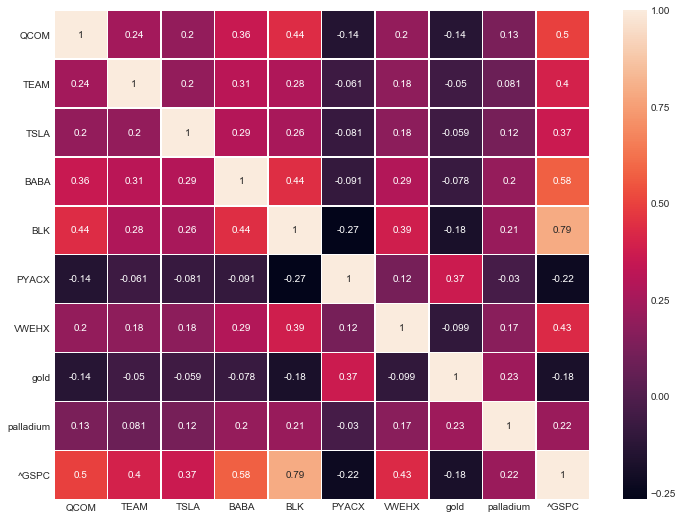

In [24]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(returns.corr(), annot=True,  linewidths=.5, ax=ax)
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('../report/media/correlation_matrix.png', bbox_inches='tight')

In [25]:
# sns.pairplot(returns, kind='reg')
# plt.savefig('../report/media/pairplot.png', bbox_inches='tight')

In [26]:
# sns.jointplot('^GSPC', 'TSLA', returns, kind='reg')

In [27]:
# y = returns[assets[0]].values
# x = returns[assets[-1]].values
# g = sns.JointGrid(x=x, y=y)
# g = g.plot(sns.regplot, sns.distplot)
# # sns.regplot(x, y)
# # sns.jointplot('^GSPC', 'TSLA', returns, kind='reg')
# plt.xlabel("Benchmark Returns")
# plt.ylabel("TSLA")
# # plt.suptitle("Portfolio Returns vs Benchmark Returns")
# plt.show()

In [28]:
x = returns[assets[-1]].values
for i in range(len(assets)):
    # fetch data for asset i
    y = returns[assets[i]].values
    # compute alpha, beta, r-squared for instrument i
    (beta, alpha, r_value) = scipy.stats.linregress(x,y)[0:3]
    df.iloc[i]['alpha'] = alpha
    df.iloc[i]['beta'] = beta
    df.iloc[i]['r-squared'] = r_value ** 2

In [29]:
df.iloc[:-1,len(q4):].T

,QCOM,TEAM,TSLA,BABA,BLK,PYACX,VWEHX,gold,palladium
alpha,0.000332087,0.00160464,0.000679725,0.000403473,-4.59033e-05,0.000289408,0.000210975,0.000437704,0.00124314
beta,1.21378,1.40011,1.31411,1.39859,1.3564,-0.0648109,0.13472,-0.167928,0.448806
r-squared,0.247523,0.160006,0.133386,0.334487,0.62088,0.0495381,0.184993,0.0322716,0.0479465


In [32]:
dd = df.iloc[:-1,len(q4):].T
dd = dd.astype(float).round(6)
dd.to_csv('../report/media/df.csv', encoding='utf-8')
print(dd.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &      QCOM &      TEAM &      TSLA &      BABA &       BLK &     PYACX &     VWEHX &      gold &  palladium \\
\midrule
alpha     &  0.000332 &  0.001605 &  0.000680 &  0.000403 & -0.000046 &  0.000289 &  0.000211 &  0.000438 &   0.001243 \\
beta      &  1.213778 &  1.400108 &  1.314113 &  1.398591 &  1.356401 & -0.064811 &  0.134720 & -0.167928 &   0.448806 \\
r-squared &  0.247523 &  0.160006 &  0.133386 &  0.334487 &  0.620880 &  0.049538 &  0.184993 &  0.032272 &   0.047946 \\
\bottomrule
\end{tabular}



## Question 6
<span style="color:blue">Calculate the return/risk of your risky portfolio. Explain each step in your analysis. You must use EXCEL’s mmult functions for this part of the analysis.</span>

## Question 7
<span style="color:blue">Derive and graph the Capital Allocation Line. Graph the Efficient Frontier with your available investment instruments (assets) and superimpose your CAL. Discuss the various options you may have and finalize your optimal point.</span>

In [28]:
# produce random weight vector with stock/bond/commodity fixed allocation
def random_weights():
    s = np.random.random(len(stocks))
    s = s / np.sum(s)
    s = ss * s
    b = np.random.random(len(bonds))
    b = b / np.sum(b)
    b = bb * b
    c = np.random.random(len(commodities))
    c = c / np.sum(c)
    c = cc * c
    weights =  np.hstack((s,b,c))
    return weights

In [29]:
# discard the benchmark (S&P500)
selected=assets[:-1]
number_of_bonds = len(bonds)
# table = get_data(selected, '3y',interval='1d').dropna()
table = data[assets[:-1]]
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and annual covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = random_weights()
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    # store the return, volatility, Sharpe ratio and weights for this imaginary portfolio
    port_returns.append(returns)
    port_sharpe_ratio.append((returns - rf/100)/volatility)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'sharpe_ratio': port_sharpe_ratio
            }

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df_ef = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility','sharpe_ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df_ef = df_ef[column_order]

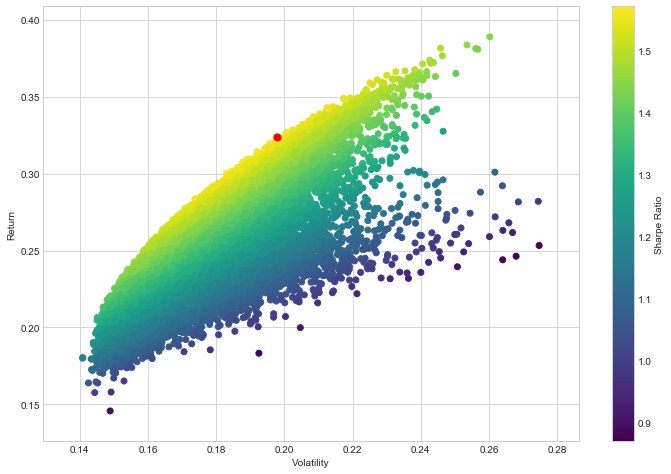

<Figure size 432x288 with 0 Axes>

In [30]:
# the optimal risky portfolio has the highest Sharpe Ratio
id = df_ef['sharpe_ratio'].idxmax()
max_sr_vol, max_sr_ret = df_ef['Volatility'][id], df_ef['Returns'][id]


plt.figure(figsize=(12,8))
plt.scatter(df_ef['Volatility'], df_ef['Returns'], c=df_ef['sharpe_ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()
plt.savefig('../report/media/random_portfolios.png', bbox_inches='tight')

---
---
---
---
---
---


To plot the Efficient Frontier, an array of optimization problems must be solved.

In [31]:
def portfolio_volatility(weights, cov_annual):
    return np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

def efficient_return(returns_annual, cov_annual, target):
    num_assets = len(returns_annual)
    args = (cov_annual)

    def portfolio_return(weights):
        return np.dot(weights, returns_annual)

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: np.sum(x[:len(stocks)]) - ss},
                   {'type': 'eq', 'fun': lambda x: np.sum(x[-len(commodities):]) - cc}
                  )
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(returns_annual, cov_annual, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(returns_annual, cov_annual, ret))
    return efficients

In [32]:
target = np.linspace(df_ef['Returns'].min(), df_ef['Returns'].max(), 50)
efficient_portfolios = efficient_frontier(returns_annual, cov_annual, target)

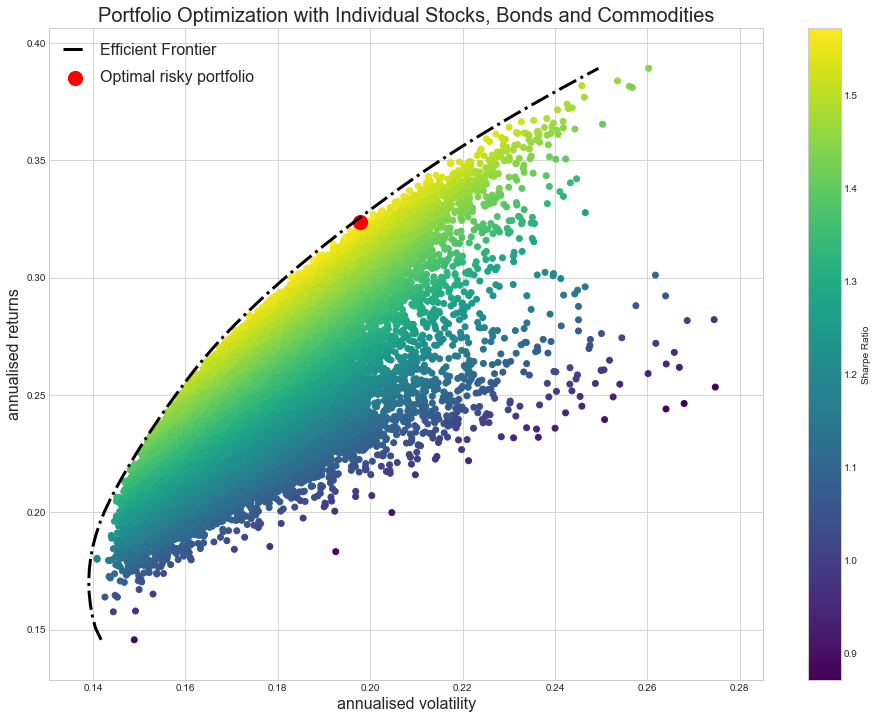

In [33]:
# Final graph that includes:
#     1. the random portfolios
#     2. The efficient frontier
#     3. The optimal risky Portfolio
fig, ax = plt.subplots(figsize=(16, 12))

# plot (1) the random portfolios
plt.scatter(df_ef['Volatility'], df_ef['Returns'], c=df_ef['sharpe_ratio'], cmap='viridis')
cbar = plt.colorbar(label='Sharpe Ratio')

# plot (2) The Efficient Frontier
ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.',lw=3, color='black', label='Efficient Frontier')

# plot (3) the Optimal Risky Portfolio
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200, label='Optimal risky portfolio') 


# title, axes and legend
ax.set_title('Portfolio Optimization with Individual Stocks, Bonds and Commodities', fontsize=20)
ax.set_xlabel('annualised volatility', fontsize=16)
ax.set_ylabel('annualised returns', fontsize=16)
ax.legend(labelspacing=0.8,shadow=True, handlelength=1.5, fontsize=16)
plt.savefig('../report/media/random_portfolios_and_EF.png', bbox_inches='tight')

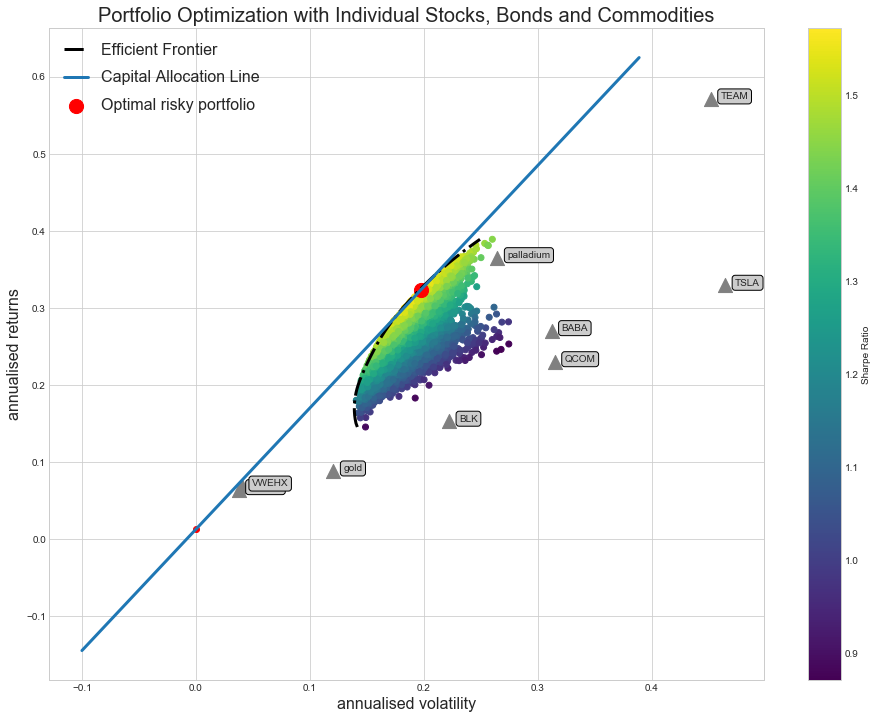

In [34]:
# Final graph that includes:
#     1. the random portfolios
#     2. The efficient frontier
#     3. The optimal risky Portfolio
#     4. the risk-free portfolio
#     5. The CAL
#     6. The individual instruments
fig, ax = plt.subplots(figsize=(16, 12))

# plot (1) the random portfolios
plt.scatter(df_ef['Volatility'], df_ef['Returns'], c=df_ef['sharpe_ratio'], cmap='viridis')
cbar = plt.colorbar(label='Sharpe Ratio')

# plot (2) The Efficient Frontier
ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.',lw=3, color='black', label='Efficient Frontier')

# plot (3) the Optimal Risky Portfolio
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200, label='Optimal risky portfolio') 

# plot (4) the risk-free portfolio
plt.scatter(0, rf/100,c='red') 

# plot (5) the CAL
x = np.linspace(-0.1, df_ef['Returns'].max(), 100)
y = x * df_ef['sharpe_ratio'].max() + rf/100
ax.plot(x,y, label='Capital Allocation Line', lw=3)


# plot (6) the individual instruments
vol = returns_daily.std()*np.sqrt(252)
ax.scatter(vol,returns_annual,marker='^',s=200,color='gray')
for i in range(len(assets)-1):
        ax.annotate(df.index.values[i], 
                    (vol[i],returns_annual[i]), 
                    xytext=(10,0), textcoords='offset points', bbox=dict(boxstyle="round", fc="0.8"))
    

# title, axes and legend
ax.set_title('Portfolio Optimization with Individual Stocks, Bonds and Commodities', fontsize=20)
ax.set_xlabel('annualised volatility', fontsize=16)
ax.set_ylabel('annualised returns', fontsize=16)
ax.legend(labelspacing=0.8,shadow=True, handlelength=1.5, fontsize=16)
plt.savefig('../report/media/final_graph.png', bbox_inches='tight')

## Question 8
<span style="color:blue">Keep a track record of the macro- and microeconomic events that influenced your assets/portfolio and offer explanations for some of them, if you deem necessary. Your explanations should also be accompanied with some quantitative verification.</span>

## Question 9
<span style="color:blue">Measure and evaluate your overall portfolio’s performance and compare it with the passive investment strategy. In this step, you should apply EXCEL’s Solver to evaluate several possible outcomes (in terms of risk and return) and explain each outcome. In that endeavor, compute the various performance measures we have learned. Decide on the best outcome for you. Discuss.</span>

## Question 10
<span style="color:blue">Finally, perform a critical evaluation of the project. In other words, what did this project accomplish for you regarding the study and (this simple) application of investment theories and strategies? What would be the implications of constructing, managing and evaluating such a portfolio for your portfolio? </span>